In [1]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd

In [2]:
from tqdm.auto import tqdm
tqdm.pandas()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [6]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

In [7]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "train.csv"
train_data = pd.read_csv(folder_path + file_path)
train_data.head() 

,id,title,abstract,category
0,2009.0642,Completely Self-Supervised Crowd Counting via ...,Dense crowd counting is a challenging task t...,cs
1,2010.13821,Wavelet Flow: Fast Training of High Resolution...,Normalizing flows are a class of probabilist...,cs
2,1904.12782,Transversally Elliptic Complex and Cohomologic...,This work is a continuation of our previous ...,math
3,2105.00878,On the Malliavin-Rubel theorem on small entire...,"In the early 1960s, P. Malliavin and L. A. R...",math
4,1906.04024,On the Odd Cycle Game and Connected Rules,We study the positional game where two playe...,math


In [10]:
sample_data = train_data.sample(100_000)
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 803849 to 367648
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        100000 non-null  object
 1   title     100000 non-null  object
 2   abstract  100000 non-null  object
 3   category  99998 non-null   object
dtypes: object(4)
memory usage: 3.8+ MB


<AxesSubplot:xlabel='category', ylabel='count'>

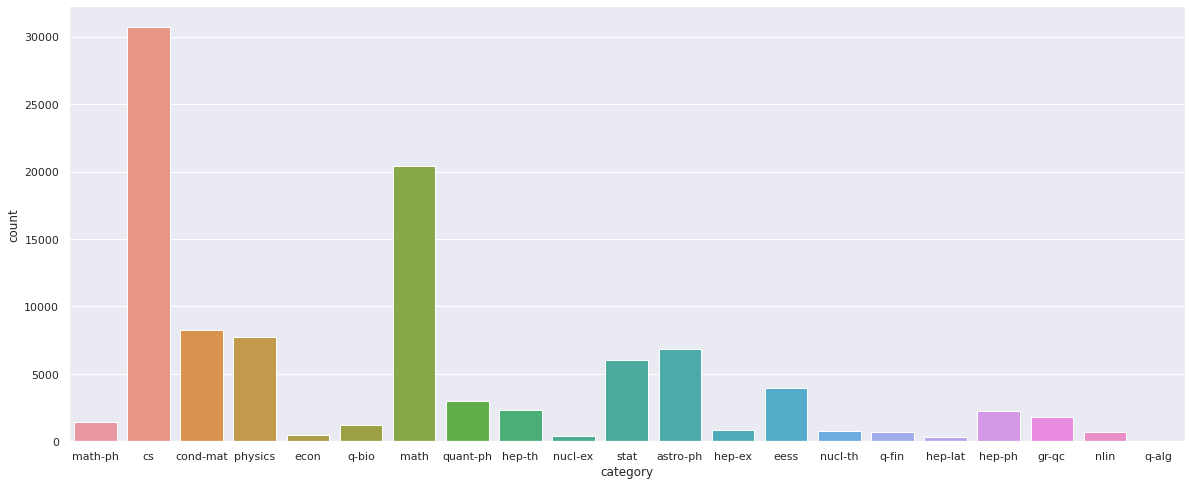

In [20]:
sns.set(rc={"figure.figsize":(20, 8)})
sns.countplot(x="category", data = sample_data)

In [11]:
tags=sample_data['title'].progress_apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
# !pip install matplotlib==3.4

In [12]:
import matplotlib
matplotlib.__version__

'3.4.0'

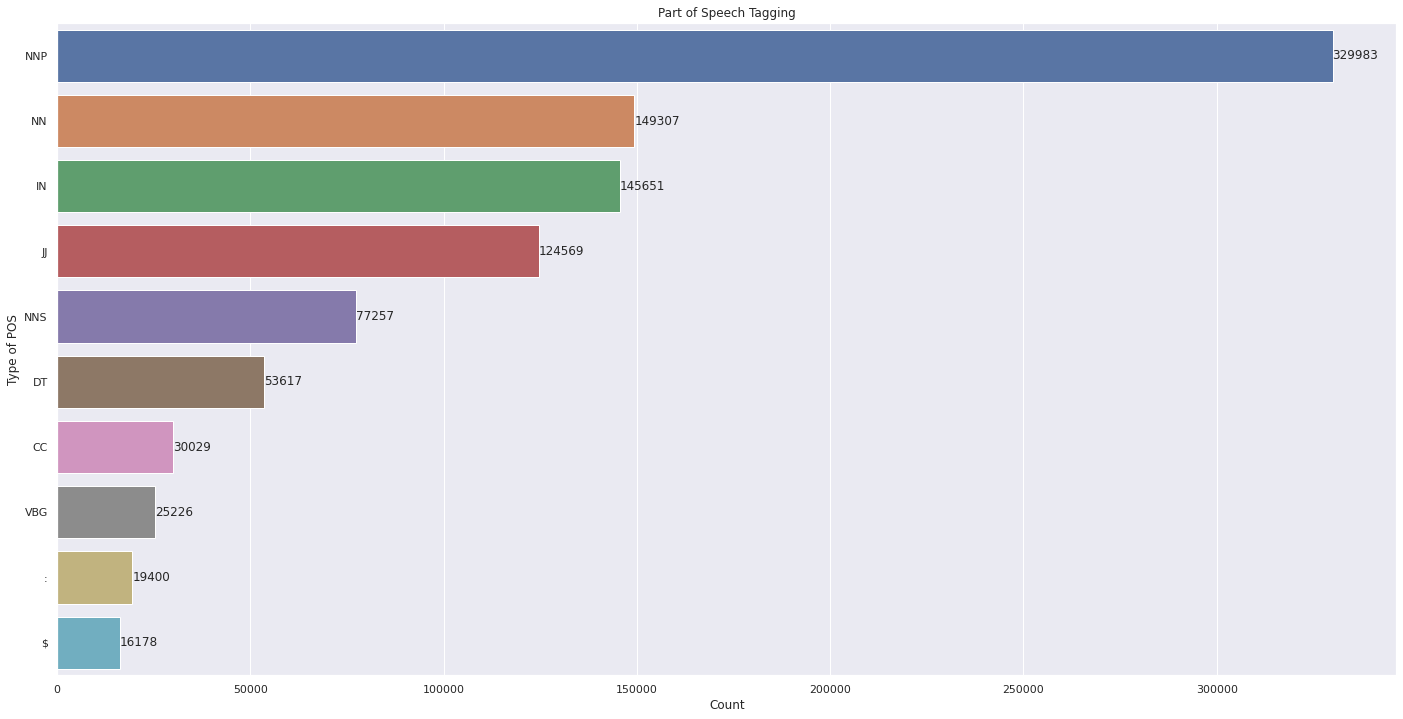

In [16]:
sns.set(rc={'figure.figsize':(24, 12)})

x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel = "Count", ylabel = "Type of POS", title = "Part of Speech Tagging")
ax.bar_label(ax.containers[0])
plt.show()

NNP = Proper Noun, singular

NN = Noun, Singular

IN = Preposition or subordinating conjunction

JJ = Adjective

NNS = Noun, plural

DT = Determiner

CC = Coordinating conjunction

VBG = Verb, gerund or present participle

: = Mid-sentence punctuation (: ; ... -- -)

$ = Currency sign

In [18]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NNP':
            adj.append(word)
    return adj

words=sample_data['title'].progress_apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)



  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

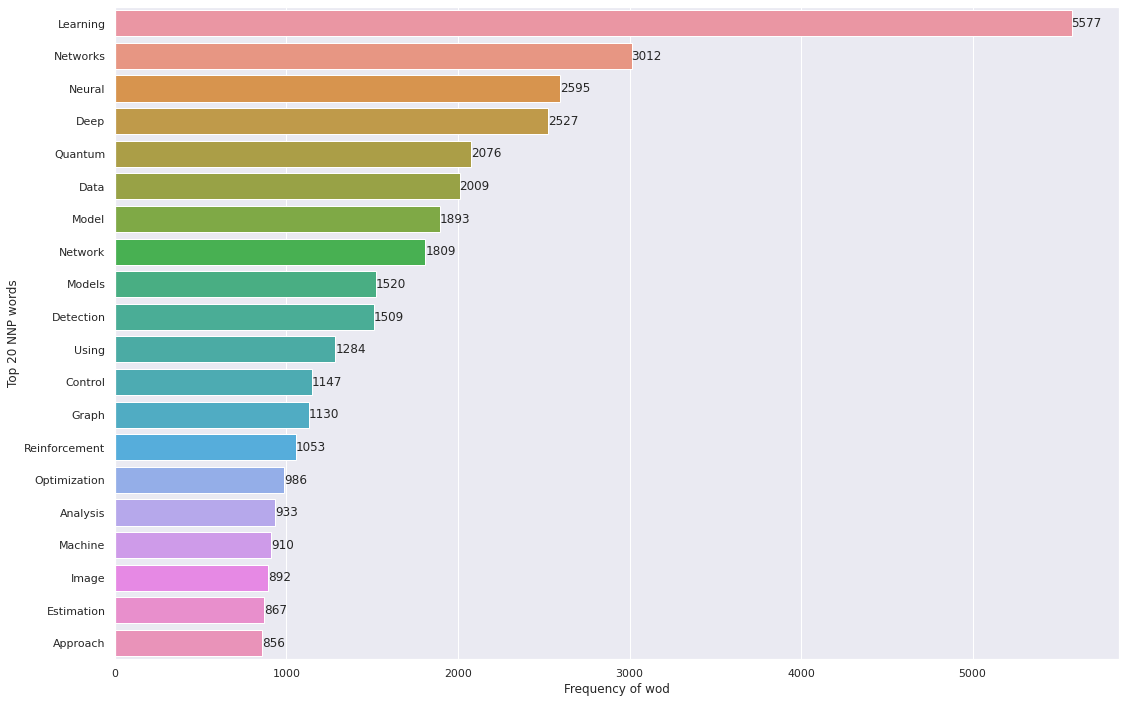

In [24]:
sns.set(rc={'figure.figsize':(18, 12)})
x,y=list(map(list,zip(*counter.most_common(20))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency of wod", ylabel="Top 20 NNP words")
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj

words=sample_data['title'].progress_apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

  0%|          | 0/100000 [00:00<?, ?it/s]

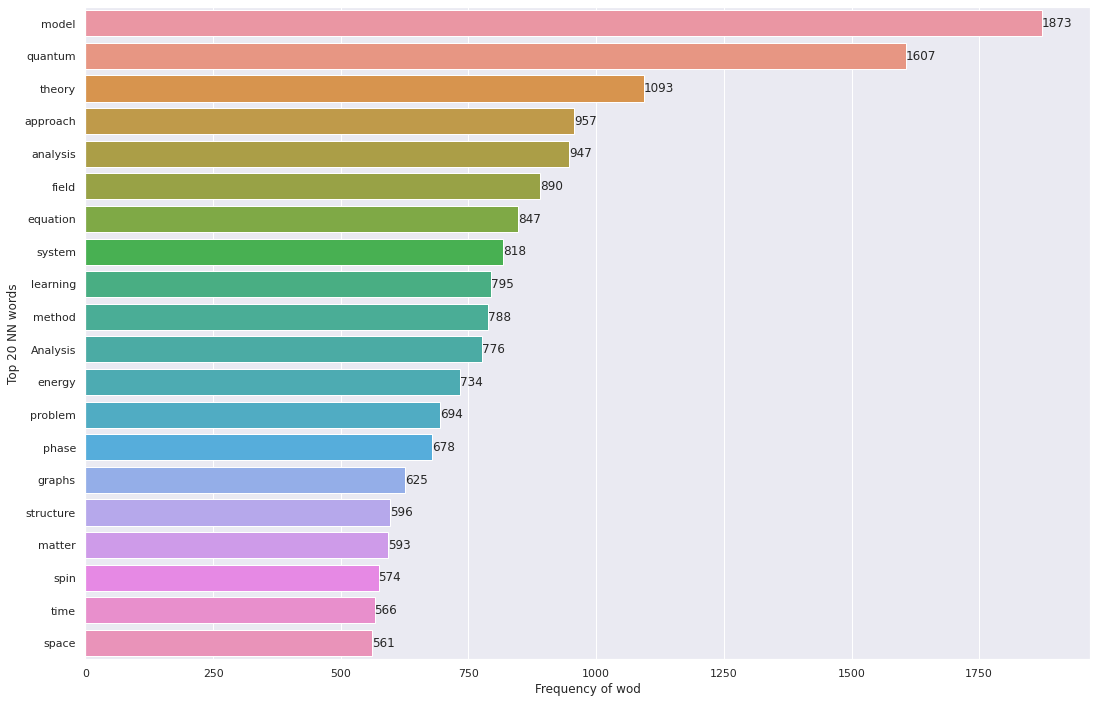

In [26]:
sns.set(rc={'figure.figsize':(18, 12)})
x,y=list(map(list,zip(*counter.most_common(20))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency of wod", ylabel="Top 20 NN words")
ax.bar_label(ax.containers[0])
plt.show()

In [27]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='IN':
            adj.append(word)
    return adj

words=sample_data['title'].progress_apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

  0%|          | 0/100000 [00:00<?, ?it/s]

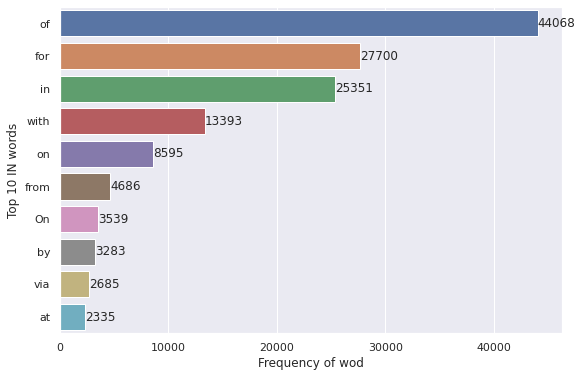

In [32]:
sns.set(rc={'figure.figsize':(9, 6)})
x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency of wod", ylabel="Top 10 IN words")
ax.bar_label(ax.containers[0])
plt.show()

In [33]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='JJ':
            adj.append(word)
    return adj

words=sample_data['title'].progress_apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

  0%|          | 0/100000 [00:00<?, ?it/s]

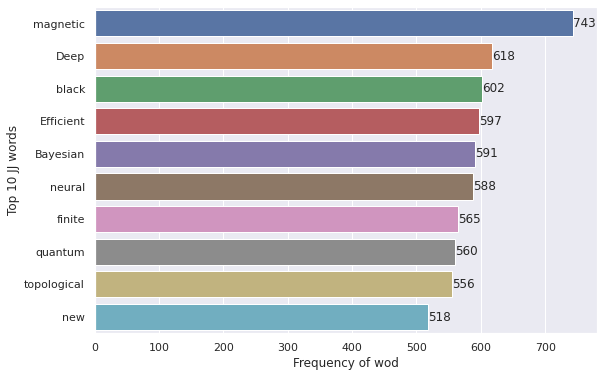

In [34]:
sns.set(rc={'figure.figsize':(9, 6)})
x,y=list(map(list,zip(*counter.most_common(10))))
ax = sns.barplot(x=y,y=x)
ax.set(xlabel="Frequency of wod", ylabel="Top 10 JJ words")
ax.bar_label(ax.containers[0])
plt.show()